### 1) Import and store the data in a data frame. (3 points)

In [51]:
import numpy as np
import pandas as pd
import os

df=pd.DataFrame()
df=pd.read_csv('airq402.csv').rename(columns=lambda x: x.strip())
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### 2) Remove the outliers from the data (5 points)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [53]:
#from the describe output, we infer that the mean and median for Distance, Average Weekly Passengers 
#and market.share.1  is too different. Presence of outliers in these column.

In [54]:
df.dtypes
df = df.drop(['City1','City2','market leading airline','Low price airline'], axis = 1)

In [55]:
df.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [56]:
#Removing outliers
df_o1=df
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
df_out = df_o1[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

### 3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. (3 points)

In [57]:
print(df.shape)
print(df_out.shape)

(1000, 7)
(885, 7)


In [60]:
X=df_out.drop('Average Fare',axis=1)
X

,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42
5,1204,199.02,40.68,137.97,17.09,127.69
6,2237,237.17,59.94,148.59,59.94,148.59
7,2467,191.95,17.89,205.06,16.59,174.00
8,1073,550.54,76.84,127.69,76.84,127.69
9,1130,202.93,35.40,132.91,26.40,124.78


In [59]:
Y = df_out[['Average Fare']]
Y

,Average Fare
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13
5,135.17
6,152.85
7,190.73
8,129.35
9,134.17


### 4) Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [61]:
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

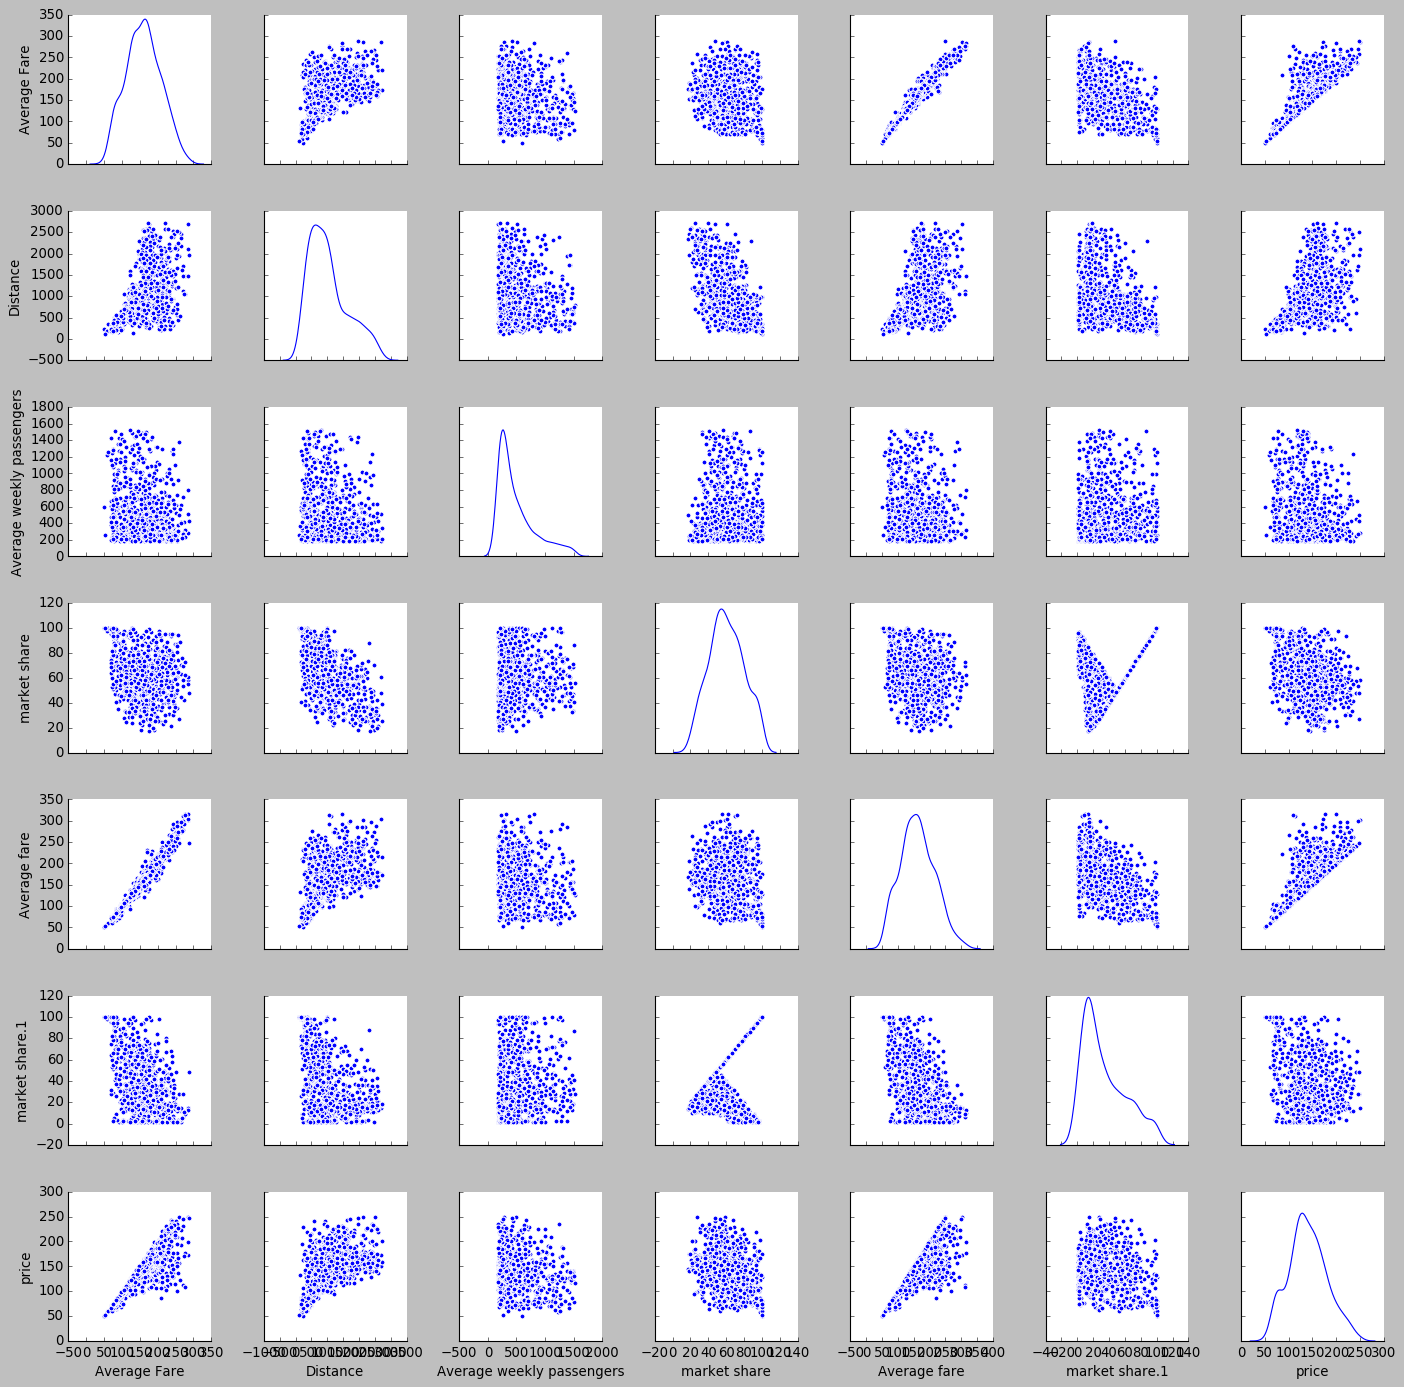

In [62]:
sns.pairplot(df_out, diag_kind='kde')

In [63]:
df_out.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share.1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [64]:
print("Looking at the correlation matrix, none of the columns have correlation values ranging from -0.1 to +0.1 with Average Fare.")
print("Hence, no columns are being dropped")

Looking at the correlation matrix, none of the columns have correlation values ranging from -0.1 to +0.1 with Average Fare.
Hence, no columns are being dropped


### 5) Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)

Text(0,0.5,'Average Fare')

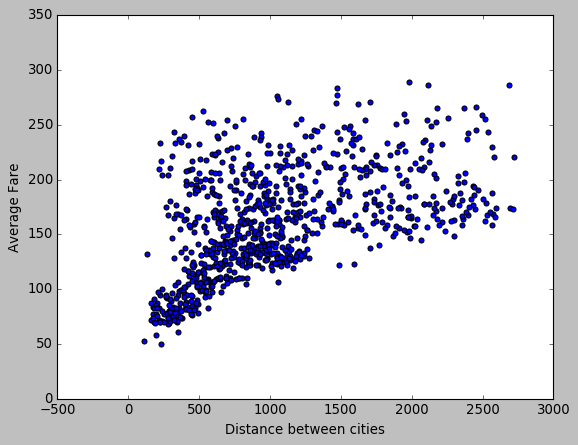

In [65]:
plt.scatter(X['Distance'],Y)
plt.xlabel("Distance between cities")
plt.ylabel("Average Fare")

In [66]:
print("Observation: Higher the distance, higher is the price")

Observation: Higher the distance, higher is the price


Text(0.5,0,'Average weekly passengers')

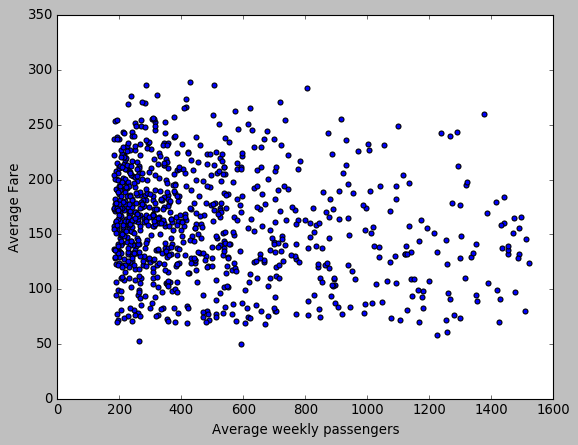

In [67]:
plt.scatter(X['Average weekly passengers'],Y)
plt.ylabel("Average Fare")
plt.xlabel("Average weekly passengers")

In [68]:
print("Observation: Don't see any specific relation")

Observation: Don't see any specific relation


Text(0.5,0,'Leading Airlines market share')

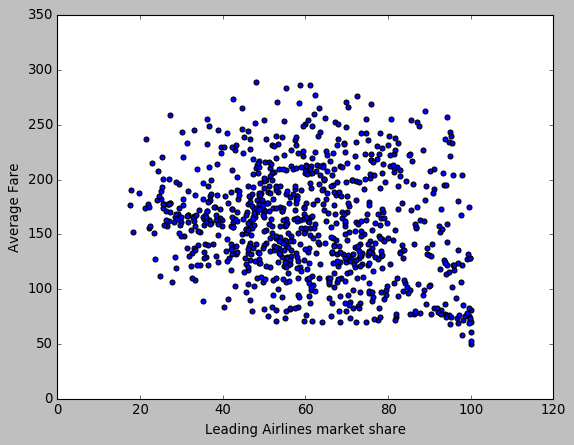

In [69]:
plt.scatter(X['market share'],Y)
plt.ylabel("Average Fare")
plt.xlabel("Leading Airlines market share")

In [70]:
print("Observation: Higher the share in the market, lower is the fare. Not conclusive though")

Observation: Higher the share in the market, lower is the fare. Not conclusive though


Text(0.5,0,'Leading airline fare')

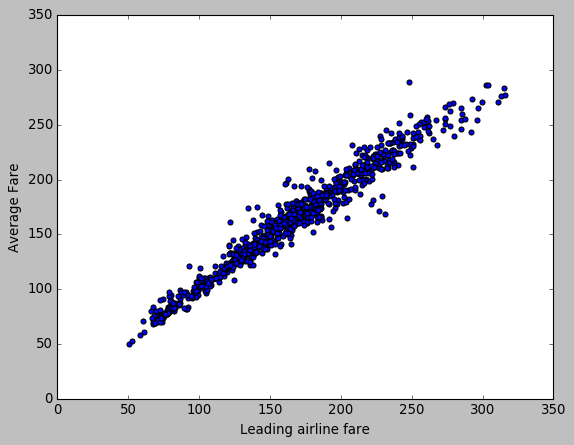

In [71]:
plt.scatter(X['Average fare'],Y)
plt.ylabel("Average Fare")
plt.xlabel("Leading airline fare")

In [72]:
print("Observation : Leading airline's fare is almost consistent with average fares of airlines")

Observation : Leading airline's fare is almost consistent with average fares of airlines


Text(0.5,0,'Low price airline market share')

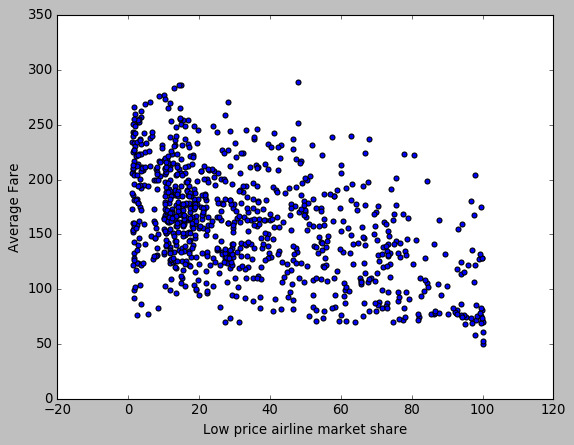

In [73]:
plt.scatter(X['market share.1'],Y)
plt.ylabel("Average Fare")
plt.xlabel("Low price airline market share")

In [74]:
print("Observation: Higher the share in the market, lower is the fare. Not conclusive though")

Observation: Higher the share in the market, lower is the fare. Not conclusive though


Text(0.5,0,'Low price airlines fare')

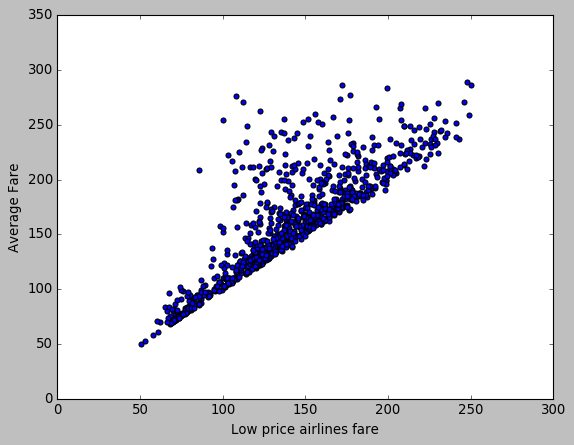

In [75]:
plt.scatter(X['price'],Y)
plt.ylabel("Average Fare")
plt.xlabel("Low price airlines fare")

In [76]:
print("Observation : Low cost airline's fare is almost consistent with average fares of airlines")

Observation : Low cost airline's fare is almost consistent with average fares of airlines


### 6) Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)
print("X_train shape : ",X_train.shape)
print("Y_train shape : ",Y_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (708, 6)
Y_train shape :  (708, 1)
X_test shape :  (177, 6)
Y_test shape :  (177, 1)


In [80]:

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 7) Print the coefficients & intercepts of the linear regression model (5 points)

In [81]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.00268055558087579
The coefficient for Average weekly passengers is -0.0034012568440139335
The coefficient for market share is 0.07798353184531764
The coefficient for Average fare is 0.7298591183630745
The coefficient for market share.1 is -0.032056029815397805
The coefficient for price is 0.23200788195185615


In [82]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.08454833898773


In [86]:
print("An intercept of {} means that the the average fare is {} even when the planes are grounded.".format(intercept,intercept))

An intercept of 4.08454833898773 means that the the average fare is 4.08454833898773 even when the planes are grounded.


In [87]:
regression_model.score(X_train, Y_train)

0.9724453942703206

In [88]:
regression_model.score(X_test, Y_test)

0.9699617495264753